# EDA 

**Summary**

In this notebook I will create a dataframe from the metedata of each audio file. 
I will also explore the characteristics of each audio file. 

In [27]:
import pandas as pd
import os
import librosa 
from librosa.display import waveshow
import matplotlib.pylab as plt 
from IPython.display import Audio

In [2]:
os.listdir('../audio_files')

['Major', 'Minor']

In [3]:
maj = os.listdir('../audio_files/Major')
minor = os.listdir('../audio_files/Minor')

In [4]:
len(maj), len(minor)

(502, 357)

In [29]:
audio_files = pd.concat([pd.DataFrame({'chord_qual': maj, 'target': 0}), 
pd.DataFrame({'chord_qual': minor, 'target': 1})], ignore_index=True)
audio_files.to_csv('audio_files.csv', index=False)

In [6]:
os.listdir('../data')

['scale_minor',
 '.DS_Store',
 'test',
 'major',
 'scale_major',
 'train',
 '.ipynb_checkpoints',
 'minor']

In [7]:
maj_img = os.listdir('../data/major')
min_img = os.listdir('../data/minor')

In [8]:
len(maj_img), len(min_img)

(2, 2)

In [9]:
maj_img

['.DS_Store', '.ipynb_checkpoints']

In [30]:
audio_files

,chord_qual,target
0,Major_500.wav,0
1,Major_266.wav,0
2,Major_272.wav,0
3,Major_299.wav,0
4,Major_474.wav,0
...,...,...
854,Minor_215.wav,1
855,Minor_201.wav,1
856,Minor_229.wav,1
857,Minor_23.wav,1


## Observe raw audio 

In [24]:
def raw_audio_vis(file_path, chord_qual):
    if chord_qual == 0:
        sig, sr = librosa.load(f'../audio_files/Major/{file_path}', sr=22050, mono=True, duration=10)
    elif chord_qual == 1:
         sig, sr = librosa.load(f'../audio_files/Minor/{file_path}', sr=22050, mono=True, duration=10)
    
    fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
    librosa.display.waveshow(sig, sr=sr, ax=ax[0])
    ax[0].set(title='Monophonic')
    ax[0].label_outer()
    
    y_harm, y_perc = librosa.effects.hpss(sig)
    librosa.display.waveshow(y_harm, sr=sr, alpha=0.25, ax=ax[1])
    librosa.display.waveshow(y_perc, sr=sr, color='r', alpha=0.5, ax=ax[1])
    ax[1].set(title='Harmonic + Percussive')



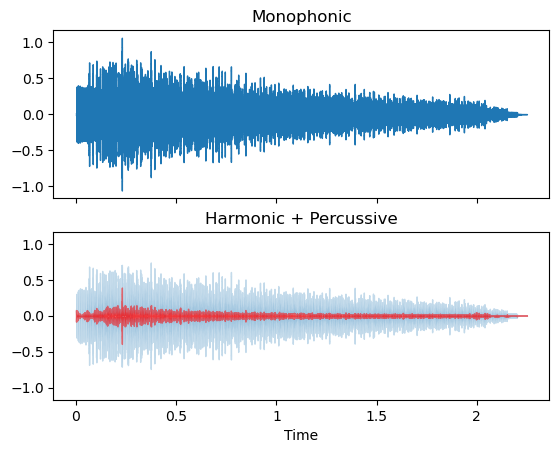

In [40]:
raw_audio_vis(audio_files['chord_qual'][555], 1)

In [38]:
aud_file = '../audio_files/Major/Major_20.wav'

audio = Audio(aud_file)

display(audio)